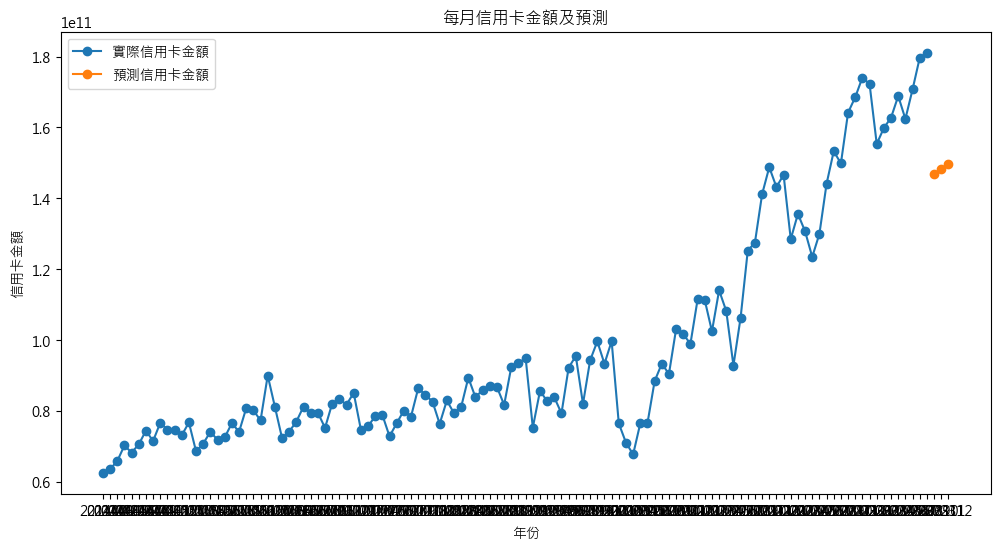

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('./processed_dataset.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年'].astype(str) + df['月'].astype(str), format='%Y%m')

# 提取年月信息為字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 移除第一行，因為成长率對於第一个月無效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 顯示結果
#print(monthly_total_expenses)

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['信用卡交易金額[新台幣]']

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# 預測2023年10月、11月和12月的信用卡金額
next_months = pd.DataFrame({'年份': [2023] * 3, '月份': [10, 11, 12]})

# 將預測的信用卡金額合併到DataFrame
next_months['預測信用卡金額'] = model.predict(next_months)

# 顯示結果
#print(next_months)

# 繪製折線圖
plt.figure(figsize=(12, 6))
plt.plot(monthly_total_expenses['年月'], monthly_total_expenses['信用卡交易金額[新台幣]'], marker='o', label='實際信用卡金額')
plt.plot(next_months['年份'].astype(str) + next_months['月份'].astype(str).str.zfill(2), next_months['預測信用卡金額'], marker='o', label='預測信用卡金額')
plt.title('每月信用卡金額及預測')
plt.xlabel('年份')
plt.ylabel('信用卡金額')
plt.legend()
plt.show()


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("./processed_dataset.csv")

# Assuming df is your DataFrame
# Make sure to convert '年' and '月' to a datetime format if they are not already
df['年月'] = pd.to_datetime(df['年'].astype(str) + '/' + df['月'].astype(str))

# Prepare data
X = df['年月'].values.reshape(-1, 1)
y = df['信用卡交易金額[新台幣]'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for October, November, and December 2023
future_dates = pd.to_datetime(['2023-10-01', '2023-11-01', '2023-12-01'])
future_dates = future_dates.values.reshape(-1, 1)
predicted_values = model.predict(future_dates)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df['年月'], df['信用卡交易金額[新台幣]'], marker='o', label='Actual')
plt.plot(future_dates, predicted_values, marker='o', linestyle='--', color='red', label='Predicted')
plt.title('信用卡交易金額的時間趨勢及預測')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_13872\2431416349.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['年月'] = pd.to_datetime(df['年'].astype(str) + '/' + df['月'].astype(str))


UFuncTypeError: ufunc 'matmul' did not contain a loop with signature matching types (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

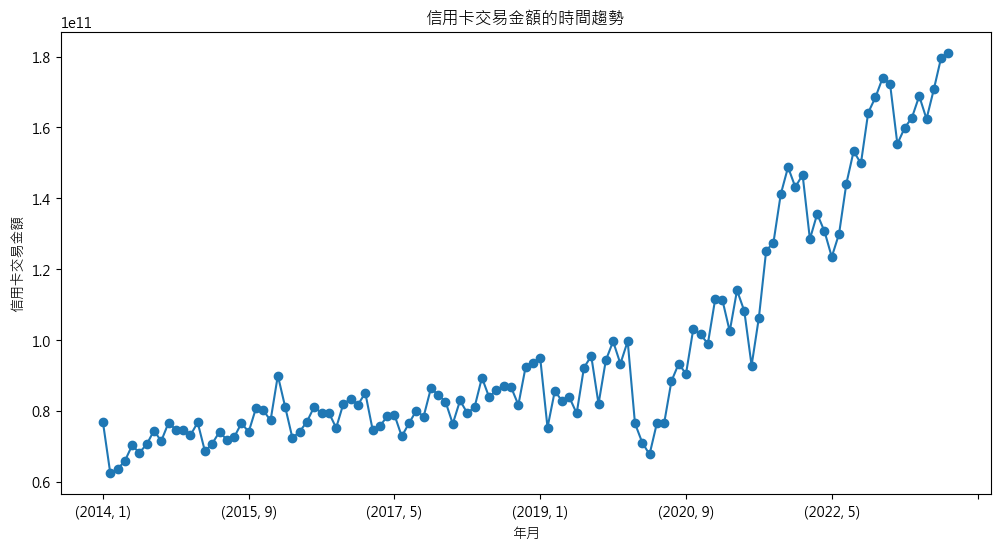

In [5]:
plt.figure(figsize=(12, 6))
df.groupby(['年', '月'])['信用卡交易金額[新台幣]'].sum().plot(marker='o')
plt.title('信用卡交易金額的時間趨勢')
plt.xlabel('年月')
plt.ylabel('信用卡交易金額')
plt.show()

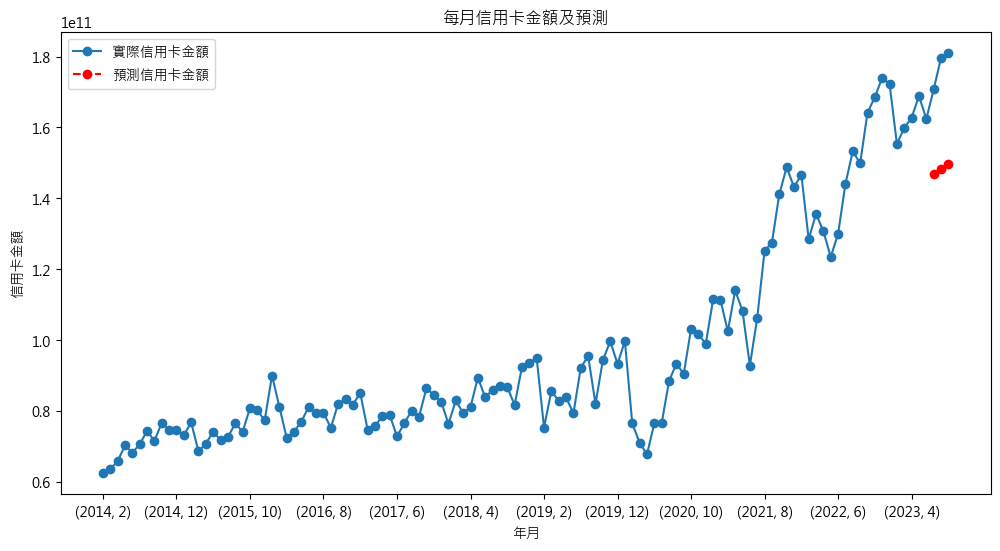

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('./processed_dataset.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年'].astype(str) + df['月'].astype(str), format='%Y%m')

# 提取年月信息為字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 移除第一行，因為成长率對於第一个月無效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 顯示結果
#print(monthly_total_expenses)

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['信用卡交易金額[新台幣]']

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# 預測2023年10月、11月和12月的信用卡金額
next_months = pd.DataFrame({'年份': [2023] * 3, '月份': [10, 11, 12]})

# 將預測的信用卡金額合併到DataFrame
next_months['預測信用卡金額'] = model.predict(next_months)

# 轉換 x 軸標籤格式
x_labels = [f"({year}, {month})" for year, month in zip(monthly_total_expenses['年份'], monthly_total_expenses['月份'])]

# 顯示結果
#print(next_months)

# 繪製折線圖
plt.figure(figsize=(12, 6))
plt.plot(x_labels, monthly_total_expenses['信用卡交易金額[新台幣]'], marker='o', label='實際信用卡金額')
plt.plot(x_labels[-3:], next_months['預測信用卡金額'], marker='o', linestyle='--', color='red', label='預測信用卡金額')
plt.title('每月信用卡金額及預測')
plt.xlabel('年月')
plt.ylabel('信用卡金額')
plt.xticks(x_labels[::10])  # Show every 3rd label for better visibility
plt.legend()
plt.show()


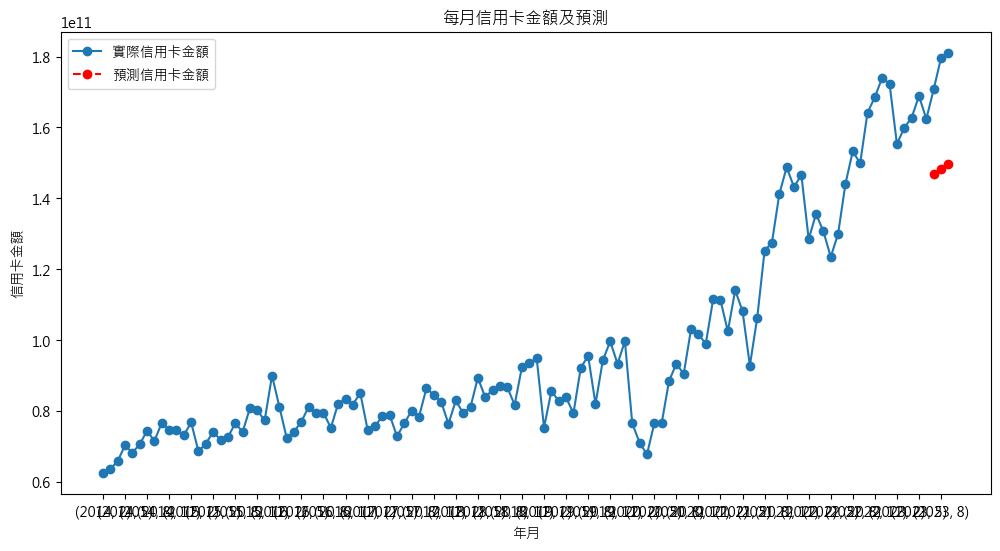

預測2023年10月、11月、12月的信用卡金額:
10月: 146875645698.91797 新台幣
11月: 148270905280.70703 新台幣
12月: 149666164862.4961 新台幣


In [23]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('./processed_dataset.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年'].astype(str) + df['月'].astype(str), format='%Y%m')

# 提取年月信息為字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 移除第一行，因為成长率對於第一个月無效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 顯示結果
#print(monthly_total_expenses)

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['信用卡交易金額[新台幣]']

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# 預測2023年10月、11月和12月的信用卡金額
next_months = pd.DataFrame({'年份': [2023] * 3, '月份': [10, 11, 12]})

# 將預測的信用卡金額合併到DataFrame
next_months['預測信用卡金額'] = model.predict(next_months)

# 轉換 x 軸標籤格式
x_labels = [f"({year}, {month})" for year, month in zip(monthly_total_expenses['年份'], monthly_total_expenses['月份'])]


# 顯示結果
#print(next_months)

# 繪製折線圖
plt.figure(figsize=(12, 6))
plt.plot(x_labels, monthly_total_expenses['信用卡交易金額[新台幣]'], marker='o', label='實際信用卡金額')
plt.plot(x_labels[-3:], next_months['預測信用卡金額'], marker='o', linestyle='--', color='red', label='預測信用卡金額')
plt.title('每月信用卡金額及預測')
plt.xlabel('年月')
plt.ylabel('信用卡金額')
plt.xticks(x_labels[::3])  # Show every 3rd label for better visibility
plt.legend()
plt.show()

# Print predicted amounts for October, November, and December 2023
print("預測2023年10月、11月、12月的信用卡金額:")
for month, amount in zip(next_months['月份'], next_months['預測信用卡金額']):
    print(f"{month}月: {amount} 新台幣")


R-squared value: 0.717569209509851


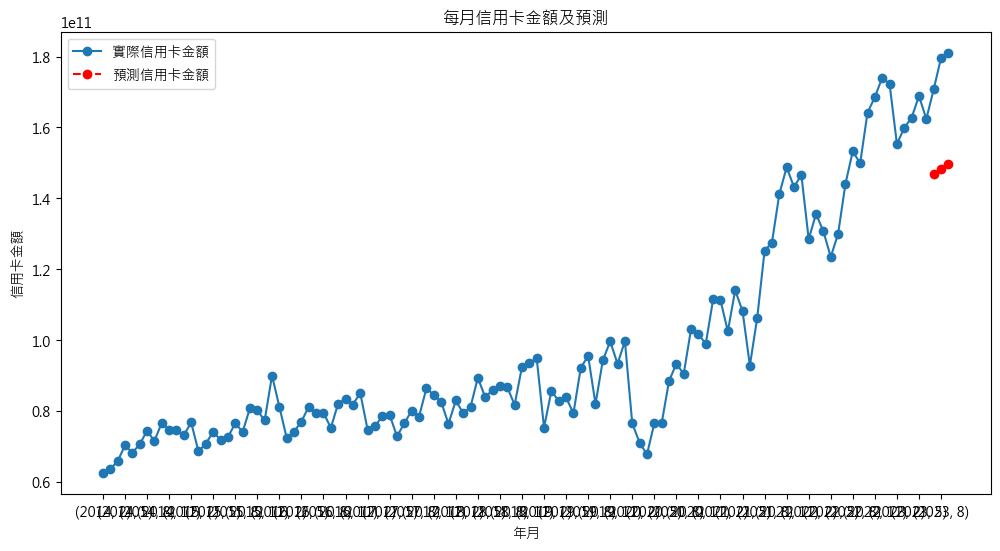

In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Microsoft JhengHei"

# 讀取CSV檔案
df = pd.read_csv('./processed_dataset.csv')

# 資料前處理
df['年月'] = pd.to_datetime(df['年'].astype(str) + df['月'].astype(str), format='%Y%m')

# 提取年月信息為字符串形式
df['年月'] = df['年月'].dt.strftime('%Y%m')

# 按照年月分组，计算每年各个月份的信用卡消费总额
monthly_total_expenses = df.groupby(['年月'])['信用卡交易金額[新台幣]'].sum().reset_index()

# 移除第一行，因為成长率對於第一个月無效
monthly_total_expenses = monthly_total_expenses.iloc[1:]

# 將 '年月' 列轉換為 datetime 並提取年份和月份
monthly_total_expenses['年份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.year
monthly_total_expenses['月份'] = pd.to_datetime(monthly_total_expenses['年月'], format='%Y%m').dt.month

# 特徵工程
X = monthly_total_expenses[['年份', '月份']]
y = monthly_total_expenses['信用卡交易金額[新台幣]']

# 創建線性回歸模型
model = LinearRegression()

# 訓練模型
model.fit(X, y)

# R-squared value
r_squared = model.score(X, y)
print(f"R-squared value: {r_squared}")

# 預測2023年10月、11月和12月的信用卡金額
next_months = pd.DataFrame({'年份': [2023] * 3, '月份': [10, 11, 12]})

# 將預測的信用卡金額合併到DataFrame
next_months['預測信用卡金額'] = model.predict(next_months)

# 轉換 x 軸標籤格式
x_labels = [f"({year}, {month})" for year, month in zip(monthly_total_expenses['年份'], monthly_total_expenses['月份'])]

# 顯示結果
#print(next_months)

# 繪製折線圖
plt.figure(figsize=(12, 6))
plt.plot(x_labels, monthly_total_expenses['信用卡交易金額[新台幣]'], marker='o', label='實際信用卡金額')
plt.plot(x_labels[-3:], next_months['預測信用卡金額'], marker='o', linestyle='--', color='red', label='預測信用卡金額')
plt.title('每月信用卡金額及預測')
plt.xlabel('年月')
plt.ylabel('信用卡金額')
plt.xticks(x_labels[::3])  # Show every 3rd label for better visibility
plt.legend()
plt.show()
